In [90]:
from hvsrUNet.module.mkdata import MkData
import numpy as np
import matplotlib.pyplot as plt
from  scipy.signal import find_peaks

def h(n, freqs, Vs, which='mean'):
    if which == 'mean':
        V_mean = np.mean(Vs[:-(n+1)])
        h = V_mean / (4 * freqs[n])
    if which == 'last':
        h = (2*n+1)*Vs[-(n+2)] / (4 * freqs[n])
    if which == 'fit':
        h = 116.7 * freqs[n]**(-1.367)

    return h 

def hv_v_f_test(Vs, H, show=True):
    mk = MkData()
    Den = mk.den(Vs)
    Damp = mk.damp(Vs)

    freqs_end = 10
    sampleNum = 1000

    freq = np.linspace(0, freqs_end, sampleNum)
    hv = mk.calc_hvsr(Vs, H, Den, Damp, freq)

    data_1 = find_peaks(hv)
    data_2 = find_peaks(-hv)
    freqs = freq[data_1[0]]

    if show == True:
        print('波峰：', freqs)
        with plt.style.context('seaborn'):
            fig, ax = plt.subplots(1, 1, figsize=(6, 4))

            ax.plot(freq, hv, color='k')
            for freq_point in freqs:
                ax.axvline(x=freq_point, color='r', linestyle='--')
                
            ax.set_xscale('log')
            plt.show()
            # for freq in freq_2:
            #     ax.axvline(x=freq, color='orange', linestyle='-.')

    return freqs, hv


In [108]:
a = [0, 1, 2, 3, 4]
a[:-1]

[0, 1, 2, 3]

波峰： [ 2.45245245  7.45745746 12.46246246 17.41741742 22.42242242 27.37737738
 32.33233233 37.28728729 42.24224224 47.14714715]


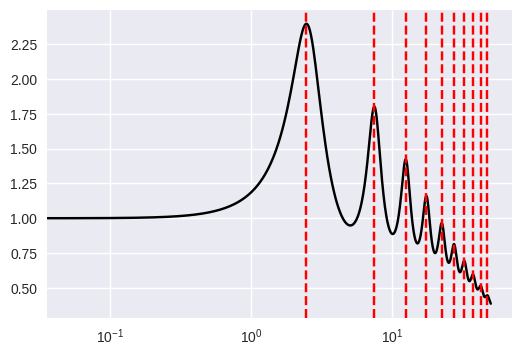

f0, 基底之上的厚度： 20.387755102040817


In [13]:
H = [20, 30]
Vs = [200, 500]

freq = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='mean'))

波峰： [ 2.75275275  6.85685686  8.75875876 12.46246246 16.21621622 17.91791792
 22.32232232 24.87487487 27.47747748 32.18218218 37.38738739 41.39139139
 49.64964965]


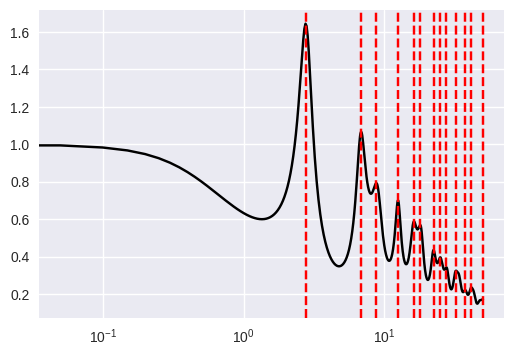

f0, 基底之上的厚度： 45.40909090909091
f1, 厚度： 21.875912408759124


In [11]:
H = [20, 30, 100]
Vs = [200, 500, 200]

freq = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='last'))
print('f1, 厚度：', h(1, freq, Vs, which='last'))

波峰： [ 3.35335335  7.35735736 14.21421421 18.76876877 24.92492492 30.78078078
 35.53553554 42.54254254 46.04604605]


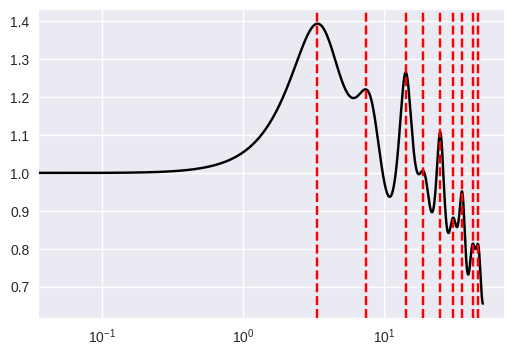

f0, 基底之上的厚度： 37.276119402985074
f1, 厚度： 40.775510204081634


In [12]:
H = [20, 20, 100]
Vs = [400, 500, 600]

freq = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='last'))
print('f1, 厚度：', h(1, freq, Vs, which='last'))

波峰： [ 0.75075075  2.5025025   4.15415415  5.80580581  7.45745746  9.90990991
 12.26226226 15.71571572 18.86886887 20.62062062 23.67367367 27.42742743
 29.72972973 35.43543544 38.78878879 47.2972973 ]


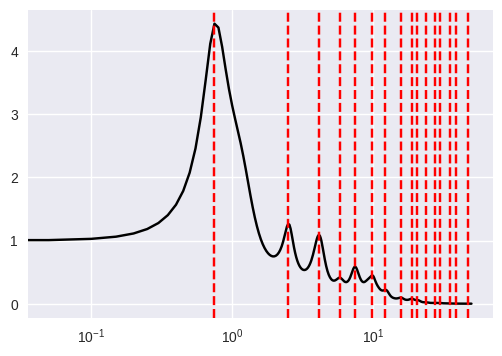

f0, 基底之上的厚度： 133.2
f1, 厚度： 44.955


In [49]:
H  = [30,  40,  50,  1000]
Vs = [100, 800, 400, 800]

freq = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='last'))
print('f1, 厚度：', h(1, freq, Vs, which='mean'))

In [ ]:
H  = [20,  20,  30,  1000]
Vs = [100, 400, 600, 800]

freq = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='mean'))
print('f1, 厚度：', h(1, freq, Vs, which='mean'))

波峰： [ 1.15115115  3.65365365  6.20620621  8.55855856 11.26126126 13.11311311
 22.27227227 31.98198198]


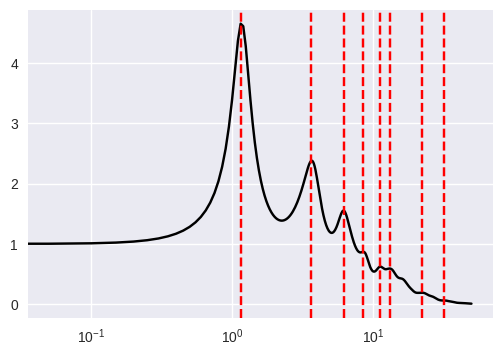

f0, 基底之上的厚度： 79.6304347826087
f1, 厚度： 17.106164383561644


In [69]:
H  = [20,  20,  30,  1000]
Vs = [100, 400, 600, 800]

freq, _ = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='mean'))
print('f1, 厚度：', h(1, freq, Vs, which='mean'))

波峰： [ 1.001001    2.4024024   3.9039039   6.05605606  7.45745746 11.16116116
 12.01201201]


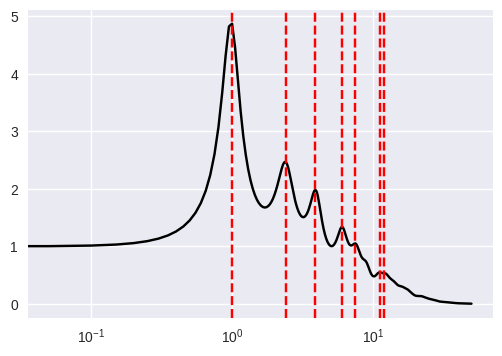

f0, 基底之上的厚度： 74.925
f1, 厚度： 15.609375


In [73]:
H  = [20,  20,  30,  1000]
Vs = [100, 200, 600, 800]

freq, _ = hv_v_f_test(Vs, H)
print('f0, 基底之上的厚度：', h(0, freq, Vs, which='mean'))
print('f1, 厚度：', h(1, freq, Vs, which='mean'))

In [114]:
len(vvvs)

560

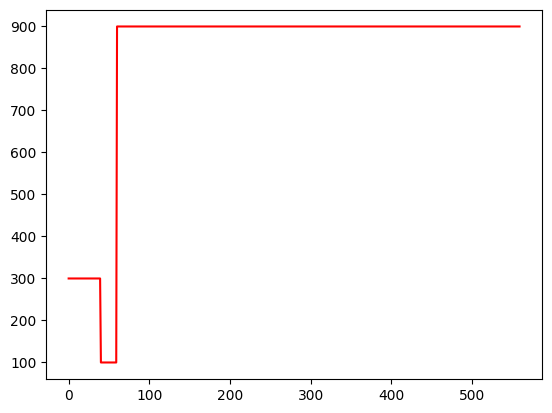

In [115]:
plt.plot(vvvs, color='r')
plt.show()

In [116]:
vvvs1 = []
H = HH[0]
for i in range(len(H)):
    for j in range(H[i]):
        vvvs1.append(Vs[i])
        
        
H = HH[1]
vvvs2 = []
for i in range(len(H)):
    for j in range(H[i]):
        vvvs2.append(Vs[i])
        
data = np.zeros((len(vvvs1), 24))
data[:, :12] = np.array(vvvs1).reshape(-1, 1)
data[:, 12:] = np.array(vvvs2).reshape(-1, 1)

ValueError: could not broadcast input array from shape (560,1) into shape (600,12)

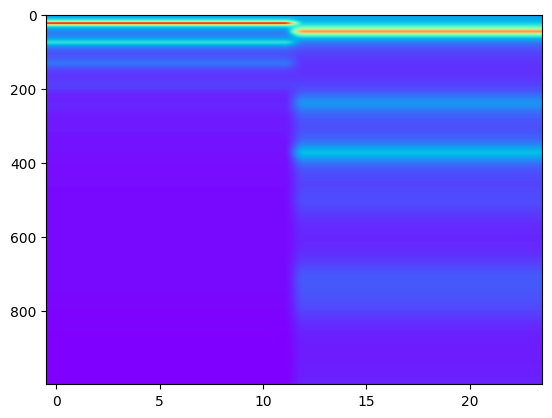

In [104]:
HH = np.array([[20, 80, 500], [40, 20, 540]])
VVs = np.array([[300, 100, 900],[300, 100, 900]])
freqs = []
for i in range(24):
    if i < 12:
        H = HH[0]
        Vs = VVs[0]
    else:
        H = HH[1]
        Vs = VVs[1]

    _, freq = hv_v_f_test(Vs, H, show=False)
    freqs.append(freq)
    
freqs = np.array(freqs)
freqs.shape

plt.imshow(freqs.T, cmap='rainbow', aspect='auto')
plt.show()

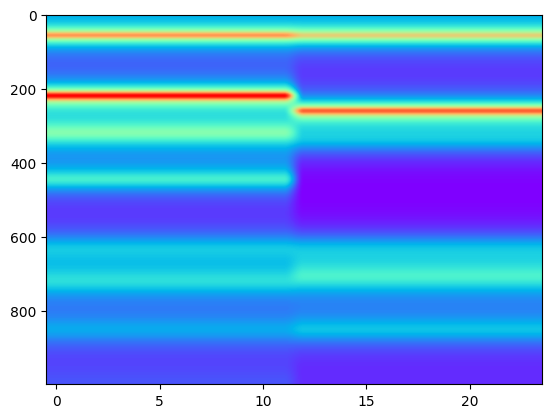

In [92]:
HH = np.array([[20,  50,  30,  1000], [20,  50,  30,  1000]])
VVs = np.array([[200, 400, 200, 800], [200, 800, 200, 800]])

freqs = []
for i in range(24):
    if i < 12:
        H = HH[0]
        Vs = VVs[0]
    else:
        H = HH[1]
        Vs = VVs[1]

    _, freq = hv_v_f_test(Vs, H, show=False)
    freqs.append(freq)
    
freqs = np.array(freqs)
freqs.shape

plt.imshow(freqs.T, cmap='rainbow', aspect='auto')
plt.show()

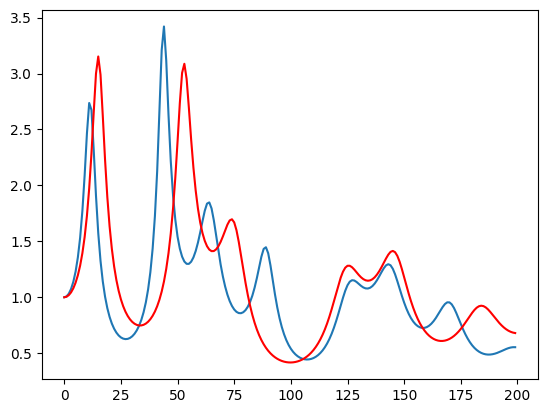

In [84]:
plt.plot(freqs[0])
plt.plot(freqs[20], 'r')
plt.show()